In [1]:
from rqalpha import run_func
from rqalpha.api import *

def init(context):
    # 正确地在RQAlpha的回测上下文中调用API函数
    
    context.N = 10  # 分成10个分位组

    # 设置回测的窗口期
    context.window = 30
    context.rebalance_period = 30  # 换仓间隔，可以调整
    
    context.factor_name = 'market_cap'  # 使用市值作为因子
    context.days_count = 0  # 跟踪天数，便于执行定期调仓

    #context.stock_pool = index_components(context.stock_pool)
    context.stock_pool = ['000001.XSHE', '000002.XSHE']


def handle_bar(context, bar_dict):
   global dt
   dt = get_factor(context.stock_pool, 'market_cap', count=1, expect_df=False)


config = {
  "base": {
    "start_date": "2020-06-01",
    "end_date": "2020-07-01",
    "benchmark": "000300.XSHG",
    "accounts": {
      "stock": 100000
    }
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": False,
      "plot": False
    }
  }
}

run_func(
    init=init,
    handle_bar=handle_bar,
    config=config
)

/Users/syesw/anaconda3/envs/py310/lib/python3.10/site-packages/rqdatac/client.py:252: UserWarning: Your account will be expired after  12 days. Please call us at 0755-22676337 to upgrade or purchase or renew your contract.
  warnings.warn("Your account will be expired after  {} days. "
[2024-10-16 20:49:51.756147] DEBUG: system_log: 
{'base': {'accounts': {'STOCK': 100000.0},
          'auto_update_bundle': False,
          'auto_update_bundle_path': None,
          'benchmark': '000300.XSHG',
          'data_bundle_path': '/Users/syesw/.rqalpha/bundle',
          'end_date': datetime.date(2020, 7, 1),
          'forced_liquidation': True,
          'frequency': '1d',
          'future_info': {},
          'futures_time_series_trading_parameters': False,
          'init_positions': [],
          'margin_multiplier': 1,
          'persist': False,
          'persist_mode': PERSIST_MODE.REAL_TIME,
          'round_price': False,
          'run_type': RUN_TYPE.BACKTEST,
          'source_

{}

In [4]:
dt

000002.XSHE    3.036875e+11
000001.XSHE    2.483958e+11
Name: 2020-06-30 00:00:00, dtype: float64

In [6]:
market_caps_sorted = dt.sort_values(ascending=False)
market_caps_sorted


000002.XSHE    3.036875e+11
000001.XSHE    2.483958e+11
Name: 2020-06-30 00:00:00, dtype: float64

In [7]:
# 计算分位数值（10分位，即每10%一个分位数）
quantiles = market_caps_sorted.quantile([i/10 for i in range(1, 11)])

# 通过分位数将数据分组，0-10%（排名靠前即市值最高），90-100%（排名靠后即市值最低）
group1 = market_caps_sorted[market_caps_sorted > quantiles[0.9]]
group10 = market_caps_sorted[market_caps_sorted <= quantiles[0.1]]

In [10]:
group1

000002.XSHE    3.036875e+11
Name: 2020-06-30 00:00:00, dtype: float64

In [12]:
target_stocks = group1.index.tolist()
target_stocks

['000002.XSHE']

[2024-10-17 08:04:19.278478] DEBUG: system_log: 
{'base': {'accounts': {'STOCK': 1000000.0},
          'auto_update_bundle': False,
          'auto_update_bundle_path': None,
          'benchmark': '000300.XSHG',
          'data_bundle_path': '/Users/syesw/.rqalpha/bundle',
          'end_date': datetime.date(2024, 10, 1),
          'forced_liquidation': True,
          'frequency': '1d',
          'future_info': {},
          'futures_time_series_trading_parameters': False,
          'init_positions': [],
          'margin_multiplier': 1,
          'persist': False,
          'persist_mode': PERSIST_MODE.REAL_TIME,
          'round_price': False,
          'run_type': RUN_TYPE.BACKTEST,
          'source_code': None,
          'start_date': datetime.date(2020, 1, 1),
          'strategy_file': 'strategy.py'},
 'extra': {'context_vars': None,
           'enable_profiler': False,
           'is_hold': False,
           'locale': None,
           'log_file': None,
           'log_level':

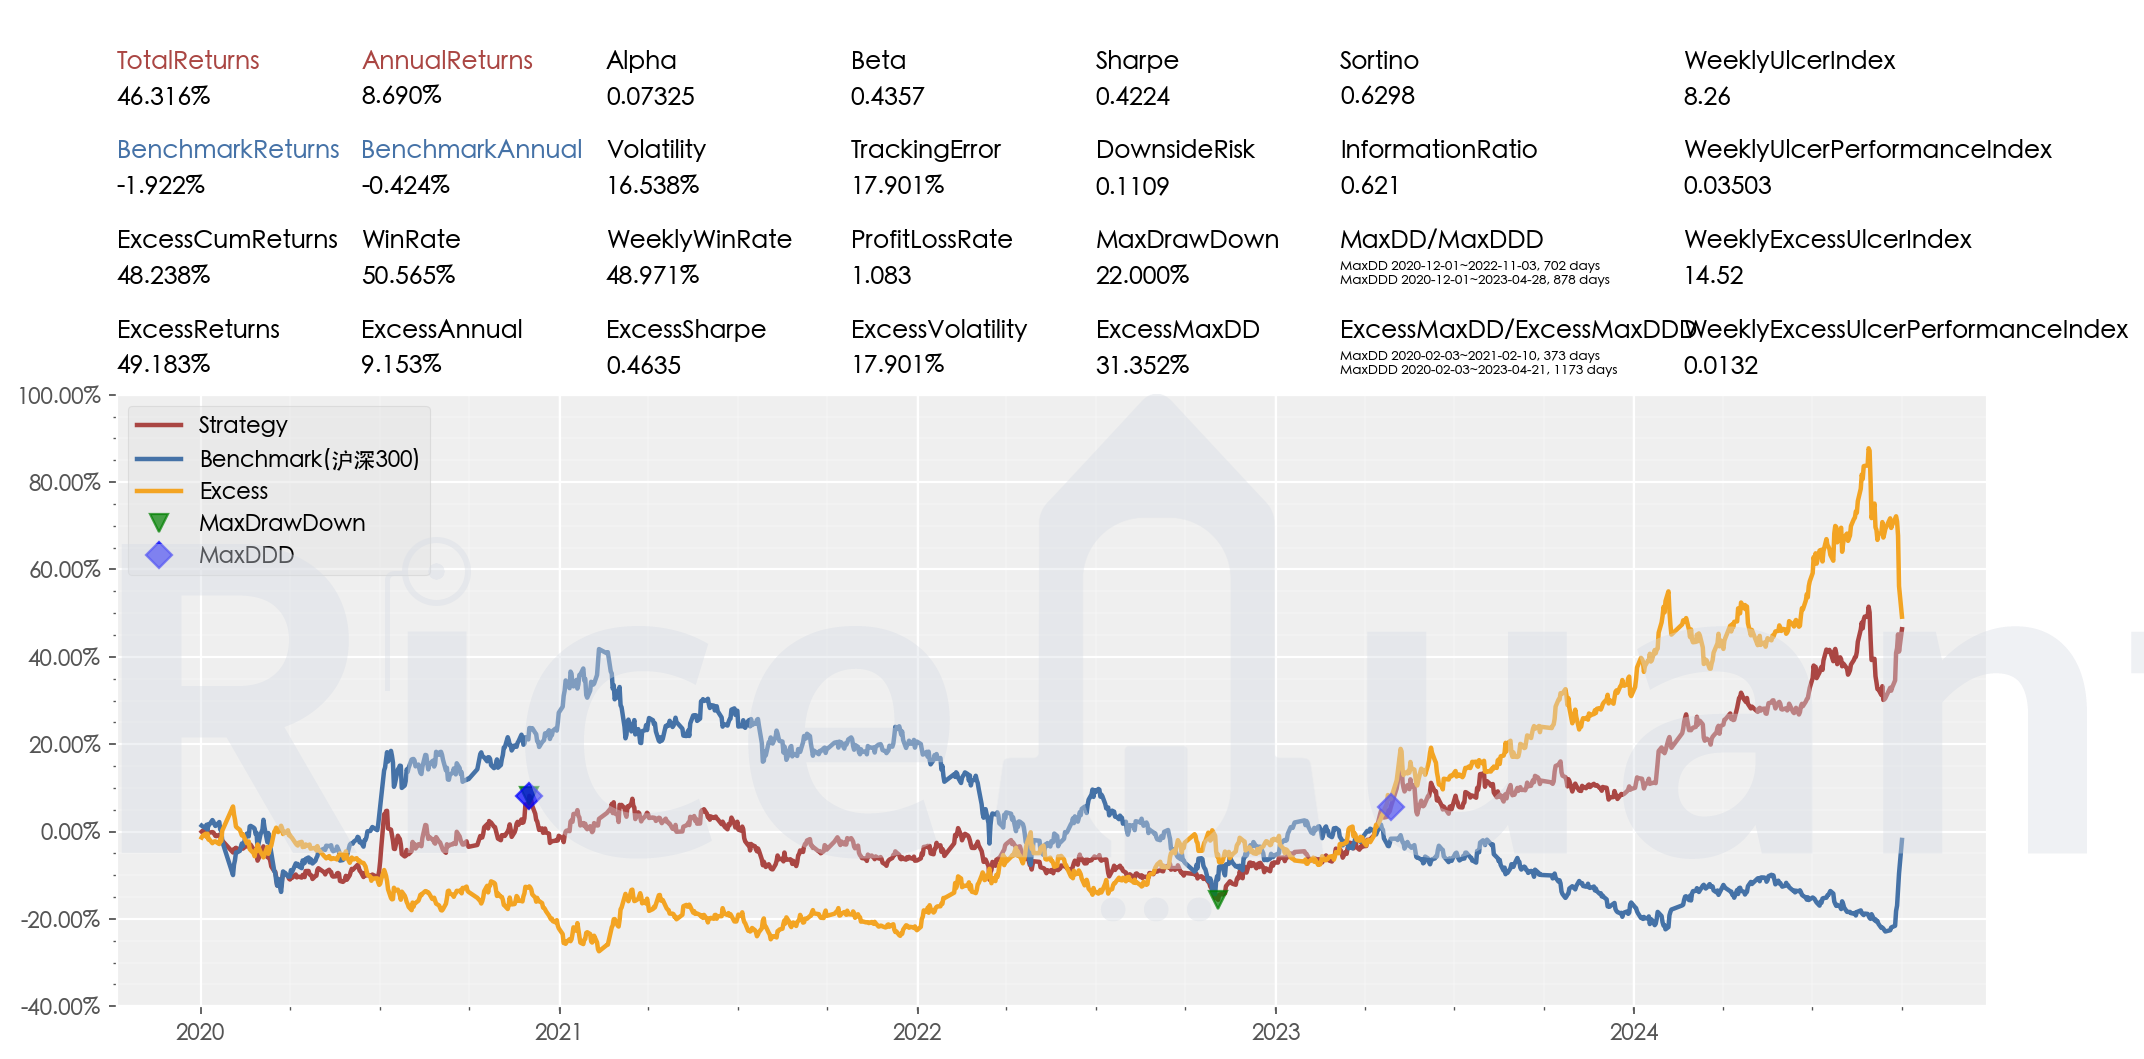

[2024-10-17 08:04:42.962065] DEBUG: system_log: mod tear_down [END]   sys_analyser
[2024-10-17 08:04:42.962394] DEBUG: system_log: mod tear_down [START] sys_risk
[2024-10-17 08:04:42.962680] DEBUG: system_log: mod tear_down [END]   sys_risk
[2024-10-17 08:04:42.962968] DEBUG: system_log: mod tear_down [START] sys_progress
[2024-10-17 08:04:42.963157] DEBUG: system_log: mod tear_down [END]   sys_progress
[2024-10-17 08:04:42.963324] DEBUG: system_log: mod tear_down [START] sys_simulation
[2024-10-17 08:04:42.963523] DEBUG: system_log: mod tear_down [END]   sys_simulation
[2024-10-17 08:04:42.963687] DEBUG: system_log: mod tear_down [START] sys_accounts
[2024-10-17 08:04:42.963841] DEBUG: system_log: mod tear_down [END]   sys_accounts
[2024-10-17 08:04:42.964001] DEBUG: system_log: strategy run successfully, normal exit


{'sys_analyser': {'summary': {'strategy_name': 'strategy',
   'start_date': '2020-01-02',
   'end_date': '2024-09-30',
   'strategy_file': 'strategy.py',
   'run_type': 'BACKTEST',
   'starting_cash': 'STOCK:1000000.0',
   'STOCK': 1000000.0,
   'benchmark': '000300.XSHG',
   'benchmark_symbol': '沪深300',
   'alpha': 0.07325119180057173,
   'beta': 0.4356960580111337,
   'sharpe': 0.42238949341068704,
   'excess_sharpe': 0.4634986096713289,
   'information_ratio': 0.6209738354243557,
   'downside_risk': 0.11090949674164936,
   'tracking_error': 0.17900906369141678,
   'sortino': 0.6298450272434598,
   'volatility': 0.1653824161977489,
   'excess_volatility': 0.17900906369141678,
   'max_drawdown': 0.219998441402452,
   'excess_max_drawdown': 0.3135210630701603,
   'excess_returns': 0.4918309743946856,
   'excess_annual_returns': 0.09152624545199894,
   'var': 0.016881367098942623,
   'win_rate': 0.5056472632493484,
   'excess_win_rate': 0.5178105994787141,
   'excess_cum_returns': 0.482

In [7]:
from rqalpha.api import *
from rqalpha import run_func

import numpy as np
import pandas as pd

# 初始化策略
def init(context):
    index = '000300.XSHG'  # 选择沪深300作为股票池
    context.stock_pool = index_components(index) 

    # 设置回测的窗口期
    context.rebalance_period = 30  # 换仓间隔，可以调整
    
    context.factor_name = 'market_cap'  # 使用市值作为因子
    context.days_count = -1  # 跟踪天数，便于执行定期调仓

# 处理bar数据的函数
def handle_bar(context, bar_dict):
    context.days_count += 1

    # 每隔context.rebalance_period天执行一次调仓
    if context.days_count % context.rebalance_period == 0:
        # 获取股票池中所有股票在过去一个调仓周期内的市值数据
        factors = get_factor(context.stock_pool, 'market_cap', count=1, expect_df=False)

        # 把因子从高到低进行排序
        market_caps_sorted = factors.sort_values(ascending=False)

        #quantiles = market_caps_sorted.quantile([i/10 for i in range(1, 11)])
        #long_group = market_caps_sorted[market_caps_sorted > quantiles[0.9]]
        #short_group = market_caps_sorted[market_caps_sorted <= quantiles[0.1]]
        #long_group_list = long_group.index.tolist()
        #short_group_list = short_group.index.tolist()

        # 选择排名最前的10只股票，即市值最高的10只
        long_group = market_caps_sorted[:10]
        long_group_list = long_group.index.tolist()
        short_group = market_caps_sorted[-10:]
        short_group_list = short_group.index.tolist()

        print("做多组:", long_group_list)
        print("做空组:", short_group_list)

        # 获取当前投资组合中的股票列表
        current_positions = list(context.portfolio.positions.keys())
        print("当前持仓股票:", current_positions)

        # 如果第一次直接pass
        if not current_positions:
            pass
        # 如果有股票持仓，先平仓
        else:
            for stock in current_positions:
                # 不在榜单直接清空
                if stock not in long_group_list and stock not in short_group_list:
                    print("清仓：", stock)
                    order_target_percent(stock, 0)

        # 再用剩下的钱分配榜单中的股票
        # 定义做多和做空的每只股票对应的权重
        long_weight_per_stock = 0.5 / len(long_group_list)
        print("做多权重：", long_weight_per_stock)
        short_weight_per_stock = -0.5 / len(short_group_list)
        print("做空权重：", short_weight_per_stock)

        # 对做多名单中的股票调整仓位
        for stock in long_group_list:
            # 注意这个是以当前可用
            order_percent(stock, long_weight_per_stock)
        
        # 对做空名单中的股票调整仓位
        for stock in short_group_list:
            order_percent(stock, short_weight_per_stock)


config = {
  "base": {
    "start_date": "2020-01-01",
    "end_date": "2024-10-01",
    "benchmark": "000300.XSHG",
    "accounts": {
      "stock": 1000000
    }
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    },
    
    "sys_accounts": {
      "validate_stock_position": False
    }

  }
}

run_func(
    init=init,
    handle_bar=handle_bar,
    config=config
)